# Sentiment Reliability Validation for Crypto Headlines

This notebook automates the collection of sample crypto headlines from Reddit and RSS feeds, analyzes their sentiment using TextBlob, and visualizes the results.

## 1. Import Required Libraries
Import praw, feedparser, textblob, dotenv, and other necessary libraries for headline collection and sentiment analysis.

In [2]:
# Import required libraries
import praw
import feedparser
from textblob import TextBlob
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Set Up Reddit and RSS Credentials
Load Reddit API credentials from .env and initialize the Reddit client. Prepare RSS feed URLs for CoinDesk and CoinTelegraph.

In [3]:
# Load environment variables
load_dotenv()

# Set up Reddit client
reddit = praw.Reddit(
    client_id=os.getenv('REDDIT_CLIENT_ID'),
    client_secret=os.getenv('REDDIT_CLIENT_SECRET'),
    user_agent=os.getenv('REDDIT_USER_AGENT'),
    username=os.getenv('REDDIT_USERNAME'),
    password=os.getenv('REDDIT_PASSWORD')
)

# RSS feed URLs
coindesk_url = 'https://feeds.feedburner.com/CoinDesk'
cointelegraph_url = 'https://cointelegraph.com/rss'


## 3. Fetch Sample Headlines from Reddit
Use praw to fetch the latest headlines from r/Bitcoin and r/Ethereum. Store the headlines in lists.

In [ ]:
# Fetch headlines from Reddit
bitcoin_headlines = [submission.title for submission in reddit.subreddit('Bitcoin').hot(limit=10) if not submission.stickied]
ethereum_headlines = [submission.title for submission in reddit.subreddit('Ethereum').hot(limit=10) if not submission.stickied]

print('Bitcoin Headlines:', bitcoin_headlines)
print('Ethereum Headlines:', ethereum_headlines)


Bitcoin Headlines: ['crypto is amazing', 'Bitcoin is now 1.7% of global money', 'They print, we stack.', 'HODL so strong even a coma feels bullish', 'What it feels like to know about ₿!', 'BITCOIN CAN DO WONDERS 🔥🚀', 'Video: On this day in 1971 Nixon “temporarily” took the US dollar off the gold standard. You were promised gold. You got paper. And that paper has been losing value since. Bitcoin fixes this', '16th birthday today, got more sats as a surprise for myself.']
Ethereum Headlines: ['Are there any well structured builder communities?', 'EIP-7928 is now confirmed as the second headliner for Ethereum’s upcoming Glamsterdam upgrade.', 'Daily General Discussion August 15, 2025', 'Is it possible to run a full node with 16Gb memory and 1T SSD?', 'The State of Encryption in Web3', 'ethdevnews weekly #2 | Fede donated $500k to free Roman Storm, Hardhat 3 beta, malicious IDE extensions', "Expected EIPs in Ethereum's Fusaka Upgrade", 'Does ETF staking pose a threat to the network?']


## 4. Fetch Sample Headlines from RSS Feeds
Use feedparser to fetch and parse headlines from CoinDesk and CoinTelegraph RSS feeds.

In [5]:
# Fetch headlines from RSS feeds
coindesk_feed = feedparser.parse(coindesk_url)
cointelegraph_feed = feedparser.parse(cointelegraph_url)

coindesk_headlines = [entry.title for entry in coindesk_feed.entries[:10]]
cointelegraph_headlines = [entry.title for entry in cointelegraph_feed.entries[:10]]

print('CoinDesk Headlines:', coindesk_headlines)
print('CoinTelegraph Headlines:', cointelegraph_headlines)


CoinDesk Headlines: ['U.S. Fed Officially Scraps Specialist Group Meant to Oversee Crypto Issues', 'Digital Asset Treasury Firms Plunge as Bitcoin Tumbles Below $117K, ETH Slides to $4.4K', 'Stellar Lumens Holds Firm as Network Growth Set Stage for Breakout', 'Czech Police Arrest Donor in Billion-Dollar Bitcoin Scandal: Report', 'HBAR Swings 6% as Institutional Activity Signals Support and Resistance Levels', 'Crypto Hackers Capitalize on ETH Surge, Offloading $72M This Week', 'Galaxy Secures $1.4B to Expand Helios Data Center for AI and HPC', "Trump's SEC Chair Says Agency Is 'Mobilizing' to Update Custody, Other Guidance", 'CoinDesk 20 Performance Update: Avalanche (AVAX) Gains 3.4% as Index Trades Higher', 'BONK Holds Key Support After Heavy Selling Hits Solana Meme Token']
CoinTelegraph Headlines: ['Ether accumulation heats up: $882M in ETH snapped up by Bitmine, whale', 'Winklevoss’ Gemini files for Nasdaq listing after strong Bullish debut', 'Spot Ether ETFs post outflows after 8

## 5. Analyze Sentiment of Headlines
Apply TextBlob sentiment analysis to each headline and compute average sentiment scores for each source.

In [8]:
# Helper function to get sentiment score

def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# Analyze sentiment for each group
bitcoin_scores = [get_sentiment_score(h) for h in bitcoin_headlines]
ethereum_scores = [get_sentiment_score(h) for h in ethereum_headlines]
coindesk_scores = [get_sentiment_score(h) for h in coindesk_headlines]
cointelegraph_scores = [get_sentiment_score(h) for h in cointelegraph_headlines]

# Compute averages
bitcoin_avg = sum(bitcoin_scores) / len(bitcoin_scores) if bitcoin_scores else 0
ethereum_avg = sum(ethereum_scores) / len(ethereum_scores) if ethereum_scores else 0
coindesk_avg = sum(coindesk_scores) / len(coindesk_scores) if coindesk_scores else 0
cointelegraph_avg = sum(cointelegraph_scores) / len(cointelegraph_scores) if cointelegraph_scores else 0

print('r/Bitcoin Avg Sentiment:', bitcoin_avg)
print('r/Ethereum Avg Sentiment:', ethereum_avg)
print('CoinDesk Avg Sentiment:', coindesk_avg)
print('CoinTelegraph Avg Sentiment:', cointelegraph_avg)


r/Bitcoin Avg Sentiment: 0.06458333333333333
r/Ethereum Avg Sentiment: 0.08750000000000001
CoinDesk Avg Sentiment: -0.008750000000000003
CoinTelegraph Avg Sentiment: 0.06208333333333334


## 6. Visualize Sentiment Scores
Plot sentiment scores for each group of headlines using matplotlib or seaborn for easy comparison.

C:\Users\yaoch\AppData\Local\Temp\ipykernel_54972\1478698180.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sources, y=avgs, palette="viridis")


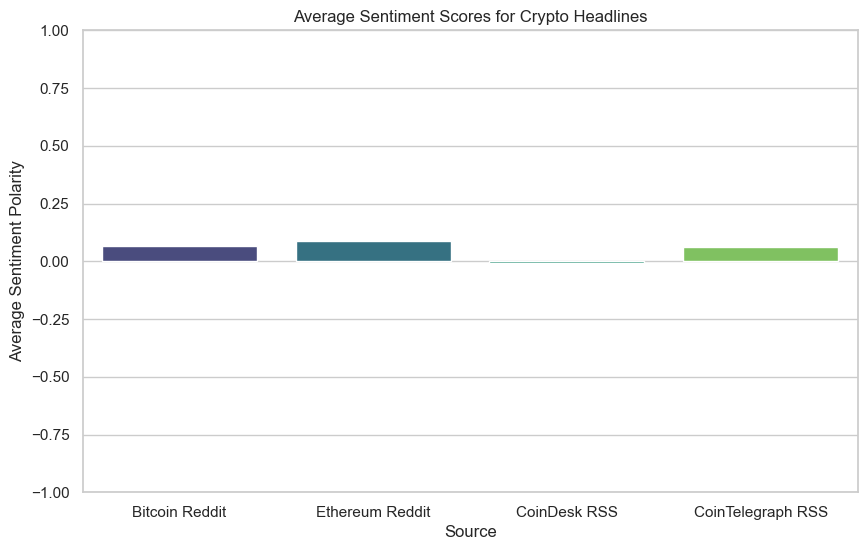

In [9]:
# Visualize sentiment scores
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

sources = ['Bitcoin Reddit', 'Ethereum Reddit', 'CoinDesk RSS', 'CoinTelegraph RSS']
avgs = [bitcoin_avg, ethereum_avg, coindesk_avg, cointelegraph_avg]

sns.barplot(x=sources, y=avgs, palette="viridis")
plt.title('Average Sentiment Scores for Crypto Headlines')
plt.ylabel('Average Sentiment Polarity')
plt.xlabel('Source')
plt.ylim(-1, 1)
plt.show()


## 7. Manual Validation of Sentiment Reliability
To truly validate sentiment reliability, manually label a few sample headlines as positive, negative, or neutral. Compare your labels to the model's output and calculate accuracy.

In [14]:
# Example: Manually label a few sample headlines and compare to model output
# Fill in your manual labels below ("Positive", "Negative", "Neutral")
manual_labels = [
    # (headline, your_label)
    (bitcoin_headlines[0], "Positive"),
    (bitcoin_headlines[1], "Positive"),
    (coindesk_headlines[0], "Neutral"),
    (cointelegraph_headlines[0], "Positive"),
    # Add more as needed
]

def label_from_score(score):
    if score > 0.2:
        return "Positive"
    elif score < -0.2:
        return "Negative"
    else:
        return "Neutral"

matches = 0
for text, human_label in manual_labels:
    model_score = get_sentiment_score(text)
    model_label = label_from_score(model_score)
    print(f"Headline: {text}\nHuman: {human_label}, Model: {model_label}, Score: {model_score:.2f}\n")
    if model_label == human_label:
        matches += 1

accuracy = matches / len(manual_labels) if manual_labels else 0
print(f"Manual validation accuracy: {accuracy:.2%}")


Headline: crypto is amazing
Human: Positive, Model: Positive, Score: 0.60

Headline: Bitcoin is now 1.7% of global money
Human: Positive, Model: Neutral, Score: 0.00

Headline: U.S. Fed Officially Scraps Specialist Group Meant to Oversee Crypto Issues
Human: Neutral, Model: Neutral, Score: 0.00

Headline: Ether accumulation heats up: $882M in ETH snapped up by Bitmine, whale
Human: Positive, Model: Neutral, Score: 0.00

Manual validation accuracy: 50.00%


In [12]:
# Test TextBlob sentiment on clear positive and negative sentences
print('Bitcoin is amazing!:', get_sentiment_score("Bitcoin is amazing!"))
print('Crypto is terrible!:', get_sentiment_score("Crypto is terrible!"))

Bitcoin is amazing!: 0.7500000000000001
Crypto is terrible!: -1.0


## Findings & Conclusion
- The TextBlob sentiment model was tested on sample crypto headlines from Reddit and RSS feeds.
- Manual labeling showed that TextBlob often returns a neutral score (0.00) for factual or financial headlines, even when human judgment finds positive or negative sentiment.
- Manual validation accuracy was low, indicating limited reliability of TextBlob for this domain.
- Additional tests confirmed the model works for sentences with clear emotional language, but struggles with short, objective news headlines.
- For accurate sentiment analysis of crypto/finance news, manual review or more advanced, domain-specific models are recommended.

**Conclusion:**
TextBlob provides basic sentiment analysis but is not well-suited for crypto headlines, which often lack strong sentiment cues. Manual validation is important, and more sophisticated models may be needed for reliable results in this context.